In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve, learning_curve, cross_validate, LearningCurveDisplay
from sklearn import metrics
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

_random_state = 0

# Preprocessing

In [3]:
beans = pd.read_excel('data/Dry_Bean_Dataset.xlsx', engine='openpyxl')

In [4]:
beans.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [5]:
beans.shape

(13611, 17)

<AxesSubplot: xlabel='Area', ylabel='Count'>

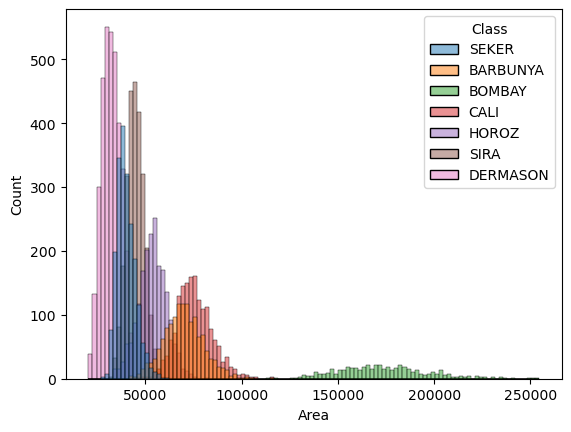

In [6]:
sns.histplot(data=beans, x="Area", hue="Class")

<AxesSubplot: xlabel='Perimeter', ylabel='Count'>

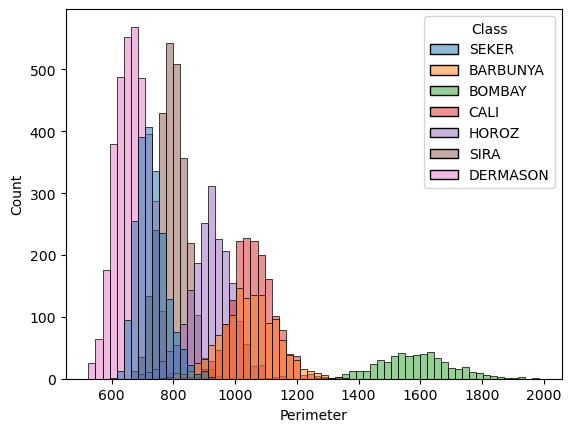

In [8]:
sns.histplot(data=beans, x="Perimeter", hue="Class")

<AxesSubplot: xlabel='MajorAxisLength', ylabel='Count'>

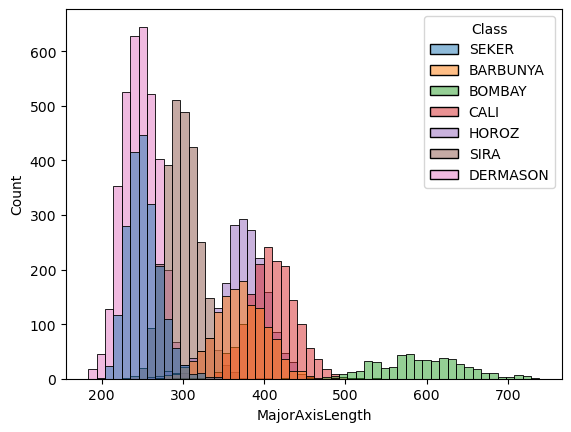

In [9]:
sns.histplot(data=beans, x="MajorAxisLength", hue="Class")

<AxesSubplot: xlabel='MinorAxisLength', ylabel='Count'>

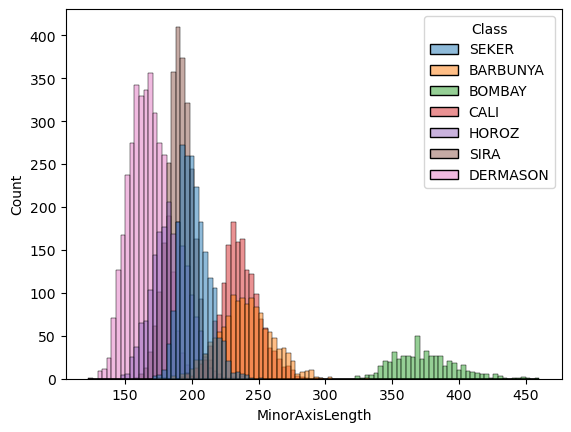

In [11]:
sns.histplot(data=beans, x="MinorAxisLength", hue="Class")

<AxesSubplot: xlabel='AspectRation', ylabel='Count'>

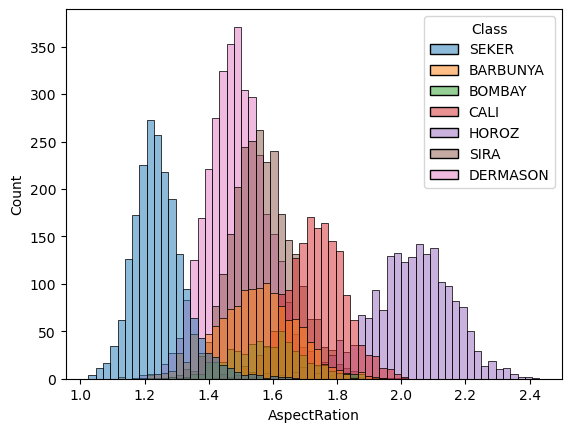

In [12]:
sns.histplot(data=beans, x="AspectRation", hue="Class")

<AxesSubplot: xlabel='Eccentricity', ylabel='Count'>

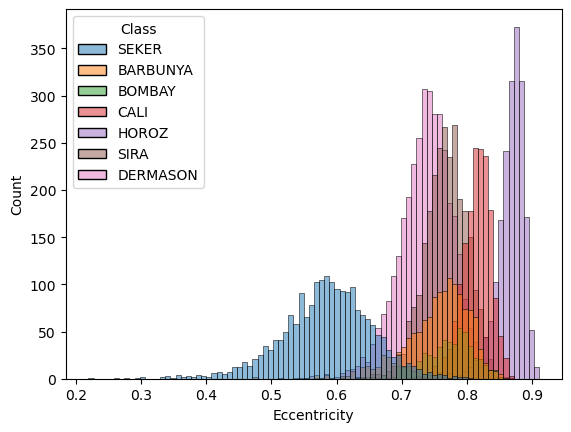

In [13]:
sns.histplot(data=beans, x="Eccentricity", hue="Class")

<AxesSubplot: xlabel='ConvexArea', ylabel='Count'>

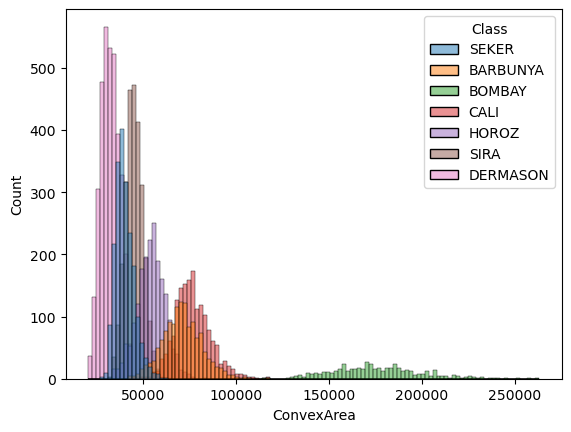

In [14]:
sns.histplot(data=beans, x="ConvexArea", hue="Class")

<AxesSubplot: xlabel='EquivDiameter', ylabel='Count'>

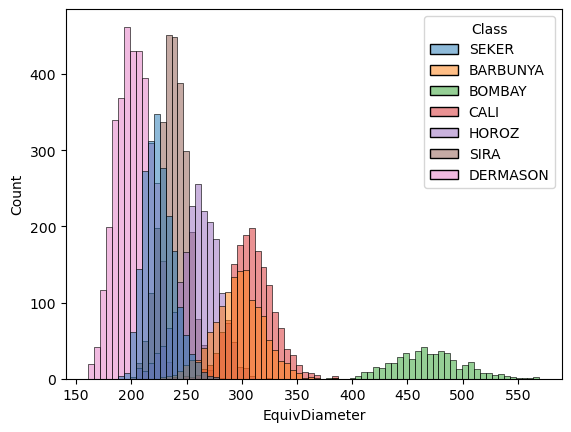

In [15]:
sns.histplot(data=beans, x="EquivDiameter", hue="Class")

<AxesSubplot: xlabel='Extent', ylabel='Count'>

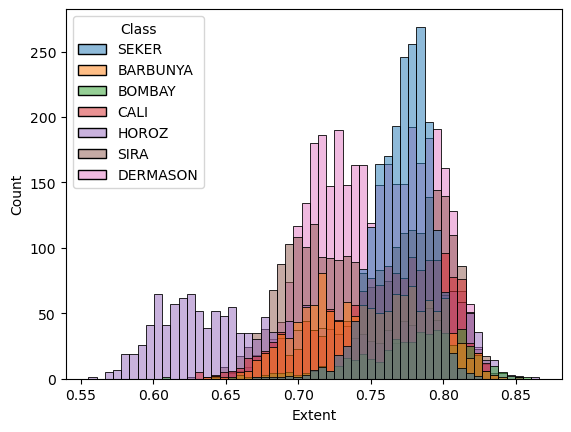

In [16]:
# not normal

sns.histplot(data=beans, x="Extent", hue="Class")

<AxesSubplot: xlabel='Solidity', ylabel='Count'>

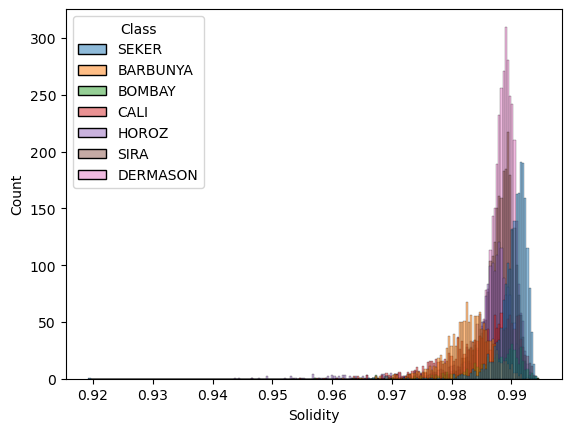

In [17]:
sns.histplot(data=beans, x="Solidity", hue="Class")

<AxesSubplot: xlabel='roundness', ylabel='Count'>

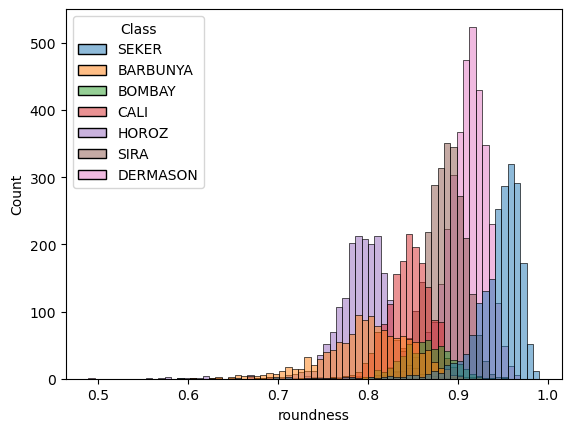

In [18]:
sns.histplot(data=beans, x="roundness", hue="Class")

<AxesSubplot: xlabel='Compactness', ylabel='Count'>

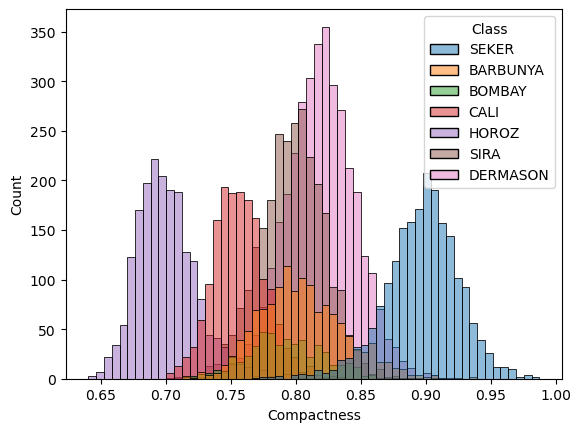

In [19]:
sns.histplot(data=beans, x="Compactness", hue="Class")

<AxesSubplot: xlabel='ShapeFactor1', ylabel='Count'>

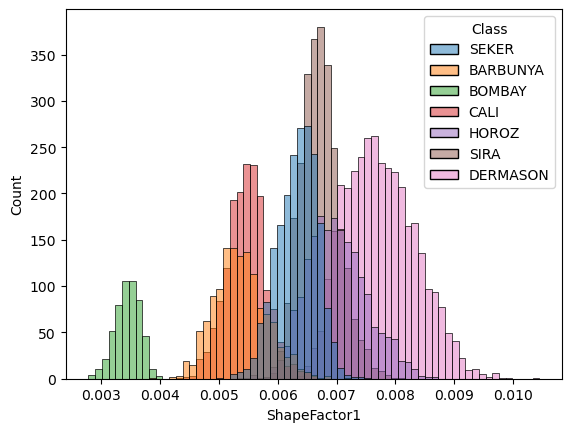

In [20]:
sns.histplot(data=beans, x="ShapeFactor1", hue="Class")

<AxesSubplot: xlabel='ShapeFactor2', ylabel='Count'>

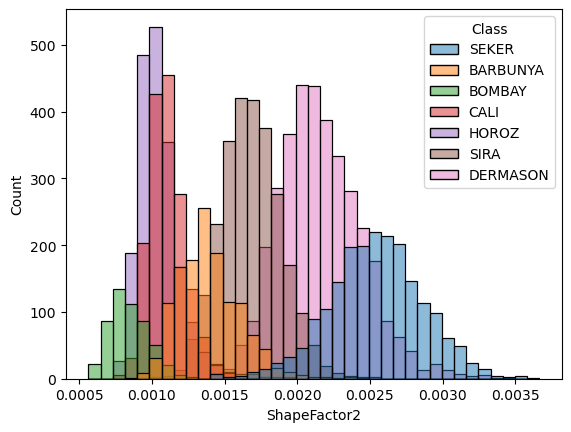

In [21]:
sns.histplot(data=beans, x="ShapeFactor2", hue="Class")

<AxesSubplot: xlabel='ShapeFactor3', ylabel='Count'>

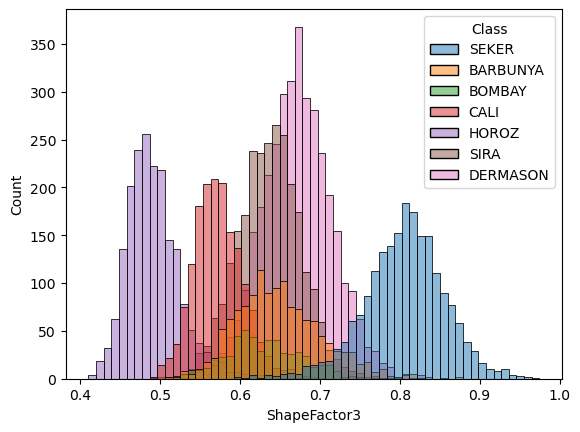

In [22]:
sns.histplot(data=beans, x="ShapeFactor3", hue="Class")

<AxesSubplot: xlabel='ShapeFactor4', ylabel='Count'>

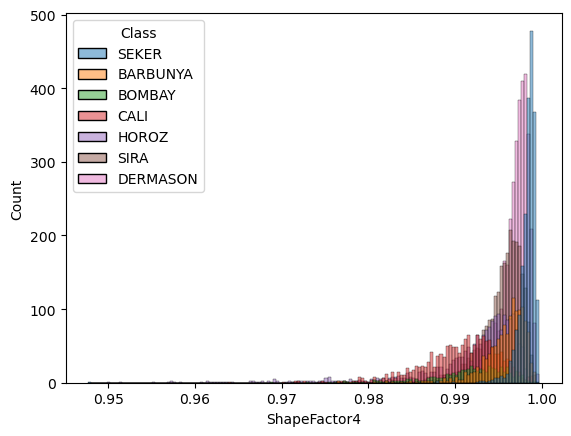

In [23]:
sns.histplot(data=beans, x="ShapeFactor4", hue="Class")

In [27]:
le = LabelEncoder()

In [28]:
le.fit(beans['Class'])
le.classes_

array(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'],
      dtype=object)

In [29]:
le.transform(beans['Class'])

array([5, 5, 5, ..., 3, 3, 3])

In [31]:
beans['Class'] = le.fit_transform(beans['Class'])

In [46]:
beans_x = beans.loc[:, beans.columns != 'Class']
beans_y = beans['Class']

In [47]:
scaler = StandardScaler() 
beans_scaled = scaler.fit_transform(beans_x)

beans_x = pd.DataFrame(beans_scaled, index=beans_x.index, columns=beans_x.columns)


In [48]:
beans_x.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,-0.840749,-1.143319,-1.306598,-0.631153,-1.565053,-2.185720,-0.841451,-1.063341,0.289087,0.367613,1.423867,1.839116,0.680786,2.402173,1.925723,0.838371
1,-0.829188,-1.013924,-1.395911,-0.434445,-1.969784,-3.686040,-0.826102,-1.044217,0.697477,-0.462907,0.231054,2.495449,0.367967,3.100893,2.689702,0.771138
2,-0.807157,-1.078829,-1.252357,-0.585735,-1.514291,-2.045336,-0.808704,-1.008084,0.578195,0.518417,1.252865,1.764843,0.603129,2.235091,1.841356,0.916755
3,-0.785741,-0.977215,-1.278825,-0.439290,-1.741618,-2.742211,-0.773975,-0.973337,0.671260,-2.241767,0.515049,2.081715,0.401718,2.515075,2.204250,-0.197985
4,-0.781239,-1.097384,-1.380471,-0.266663,-2.117993,-4.535028,-0.784286,-0.966080,0.476020,0.804772,1.874992,2.765330,0.118268,3.270983,3.013462,0.939640


In [51]:
X_train, X_test, y_train, y_test = train_test_split(beans_x, beans_x, test_size = 0.2, random_state=_random_state)